# 07-平均池化（Average Pooling）

将图片按照固定大小网格分割，网格内的像素值取网格内所有像素的平均值。

把图片使用均等大小网格分割，并求网格内代表值的操作称为池化（Pooling）。卷积神经网络（Convolutional Neural Network）中重要的图像处理方式。

平均池化按照下式定义： $$ v=\frac{1}{|R|}\ \sum\limits_{i=1}^R\ v_i $$ 请把图片使用$8\times8$的网格做平均池化。

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('../picture/lena.jpg')

In [6]:
#平均池化

def average_pooling(img, G):
    
    out = img.copy()

    H, W, C = img.shape
    Nh = int(H / G)
    Nw = int(W / G)

    #网格值等于原格子内的像素平均值
    
    for y in range(Nh):
        for x in range(Nw):
            for c in range(C):
                out[G*y:G*(y+1), G*x:G*(x+1), c] = np.mean(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)
    
    return out

In [9]:
#使用24进行池化

img_ave = average_pooling(img,24)

In [10]:
cv2.imwrite('../picture/cat_result7_average_pooling24.jpg', img_ave)
cv2.namedWindow("result", 0);
cv2.resizeWindow("result", (800, 600));
cv2.imshow("result", img_ave)
cv2.waitKey(0)
cv2.destroyAllWindows()

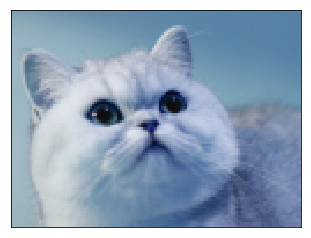

In [13]:
plt.xticks([])
plt.yticks([])
plt.imshow(img_ave)
plt.show()

# 08-最大池化（Max Pooling）

网格内的值不取平均值，而是取网格内的最大值进行池化操作。

In [17]:
#最大池化

def max_pooling(img, G):
    
    out = img.copy()

    H, W, C = img.shape
    Nh = int(H / G)
    Nw = int(W / G)

    #网格值等于原格子内的像素最大值
    
    for y in range(Nh):
        for x in range(Nw):
            for c in range(C):
#                 out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c]).astype(np.int)
                    out[G*y:G*(y+1), G*x:G*(x+1), c] = np.max(out[G*y:G*(y+1), G*x:G*(x+1), c])
    
    return out

In [20]:
img_max = max_pooling(img, 24)

In [21]:
cv2.imwrite('../picture/cat_result8_maxpooling24.jpg', img_max)
cv2.namedWindow("result", 0);
cv2.resizeWindow("result", (800, 600));
cv2.imshow("result", img_max)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 09-高斯滤波（Gaussian Filter）

使用高斯滤波器（$3\times3$大小，标准差$\sigma=1.3$）对图像进行降噪处理

高斯滤波器是一种可以使图像平滑的滤波器，用于去除噪声。可用于去除噪声的滤波器还有中值滤波器（参见问题十），平滑滤波器（参见问题十一）、LoG滤波器（参见问题十九）。

高斯滤波器将中心像素周围的像素按照高斯分布加权平均进行平滑化。这样的（二维）权值通常被称为卷积核（kernel）或者滤波器（filter）。

但是，由于图像的长宽可能不是滤波器大小的整数倍，因此我们需要在图像的边缘补$0$。这种方法称作Zero Padding。并且权值$g$（卷积核）要进行归一化操作（$\sum\ g = 1$）。

按下面的高斯分布公式计算权值： $$ g(x,y,\sigma)=\frac{1}{2\ \pi\ \sigma^2}\ e^{-\frac{x^2+y^2}{2\ \sigma^2}} $$

标准差$\sigma=1.3$的$8-$近邻高斯滤波器如下： $$ K=\frac{1}{16}\ \left[ \begin{matrix} 1 & 2 & 1 \ 2 & 4 & 2 \ 1 & 2 & 1 \end{matrix} \right] $$

In [3]:
import random

In [4]:
#添加椒盐噪声     prob:噪声比例

def sp_noise(image,prob):
    
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            rdn = random.random()             #随机生成 0-1之间的数字
            if rdn < prob:                             #如果生成的随机数小于噪声比例则将该像素点添加黑点，即椒噪声
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255                    #如果生成的随机数大于（1-噪声比例）则将该像素点添加白点，即盐噪声
            else:
                output[i][j] = image[i][j]
                
    return output


#添加高斯噪声    mean : 均值      var : 方差，方差越大噪声越大

def gasuss_noise(image, mean, var):
    
    image = np.array(image/255, dtype=float)                               #将原始图像的像素值进行归一化，除以255使得像素值在0-1之间
    
    noise = np.random.normal(mean, var ** 0.5, image.shape)    #创建一个均值为mean，方差为var呈高斯分布的图像矩阵
    
    out = image + noise                                                                 #将噪声和原始图像进行相加得到加噪后的图像
    
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
        
    out = np.clip(out, low_clip, 1.0)          #clip函数将元素的大小限制在了low_clip和1之间了，小于的用low_clip代替，大于1的用1代替
    out = np.uint8(out*255)                      #解除归一化，乘以255将加噪后的图像的像素值恢复
    
    return out

In [5]:
# img_noise = gasuss_noise(img, 0, 0.001)

img_noise = sp_noise(img,  0.01)

In [6]:
cv2.imwrite('../picture/lena_sp_noise.jpg', img_noise)
cv2.namedWindow("result", 0);
cv2.resizeWindow("result", (800, 600));
cv2.imshow("result", img_noise)
cv2.waitKey(0)
cv2.destroyAllWindows()

 $$ g(x,y,\sigma)=\frac{1}{2\ \pi\ \sigma^2}\ e^{-\frac{x^2+y^2}{2\ \sigma^2}} $$

In [7]:
# 高斯滤波器

def gaussian_filter(img, K_size, sigma):

    if len(img.shape) == 3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape                               #确保图像为 3 通道

    # Zero padding
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)     #生成 （ h+pad*2， w+pad*2，c）的 0 矩阵
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)   #矩阵中间是原图像，边缘补为 0

    # prepare Kernel
    K = np.zeros((K_size, K_size), dtype=np.float)
    for x in range(-pad, -pad + K_size):
        for y in range(-pad, -pad + K_size):
            K[y + pad, x + pad] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * sigma * sigma)
    K /= K.sum()

    tmp = out.copy()

    # 滤波
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])

    out = np.clip(out, 0, 255)
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8)   #去除 padding

    return out

In [8]:
#使用高斯滤波器（ 3×3 大小，标准差 σ=1.3）对图像进行降噪处理
img_gaus = gaussian_filter(img_noise, K_size=15, sigma=1.3)

In [9]:
cv2.imwrite('../picture/lena_result9_gaus_filter.jpg', img_gaus)
cv2.namedWindow("result", 0);
cv2.resizeWindow("result", (800, 600));
cv2.imshow("result", img_gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()